## Decision Tree Regression 
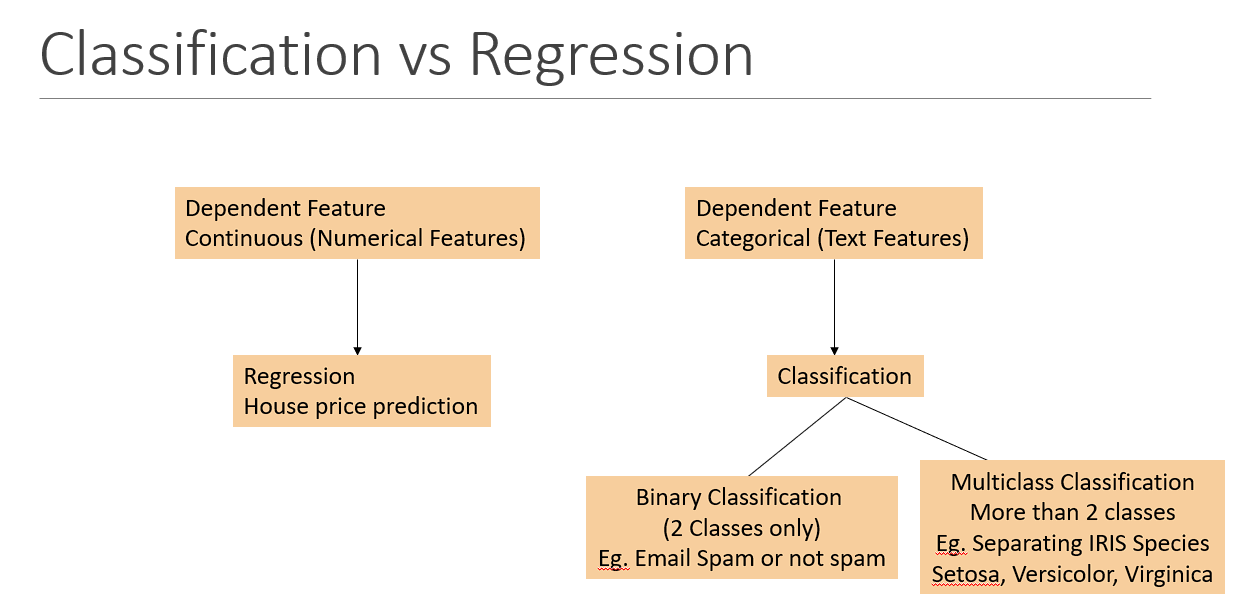

## Read the dataset

In [4]:
from warnings import filterwarnings
filterwarnings("ignore")

In [5]:
import pandas as pd 
df=pd.read_csv('50_Startups.csv')

In [6]:
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


## Checking missing values 

In [8]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## Seprate X and Y from Dataset

In [9]:
X = df.drop(columns=['PROFIT'])
Y = df[['PROFIT']]

In [10]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [11]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## From X seprate cat and con

In [13]:
cat = list(X.columns[X.dtypes==object])
con = list(X.columns[X.dtypes!=object])

In [14]:
cat

['STATE']

In [15]:
con

['RND', 'ADMIN', 'MKT']

## Creating a Scikitlearn  Pipline

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

In [17]:
# Creating a num pipeline 
num_pipe = Pipeline(steps= [('imputer',SimpleImputer(strategy='mean')),
                            ('scaler',StandardScaler())])

# Creating a cat Pipeline
cat_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder())])

# Combine both Pipeline
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])


In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [21]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [24]:
x_pre = pd.DataFrame(X_pre,columns=cols)
x_pre.head()

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0


## Train , Test split

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,Y,test_size=0.30,random_state=42)

In [28]:
xtrain.shape

(35, 6)

In [29]:
xtest.shape

(15, 6)

In [30]:
ytrain.shape

(35, 1)

In [31]:
ytest.shape

(15, 1)

##  Creating a model

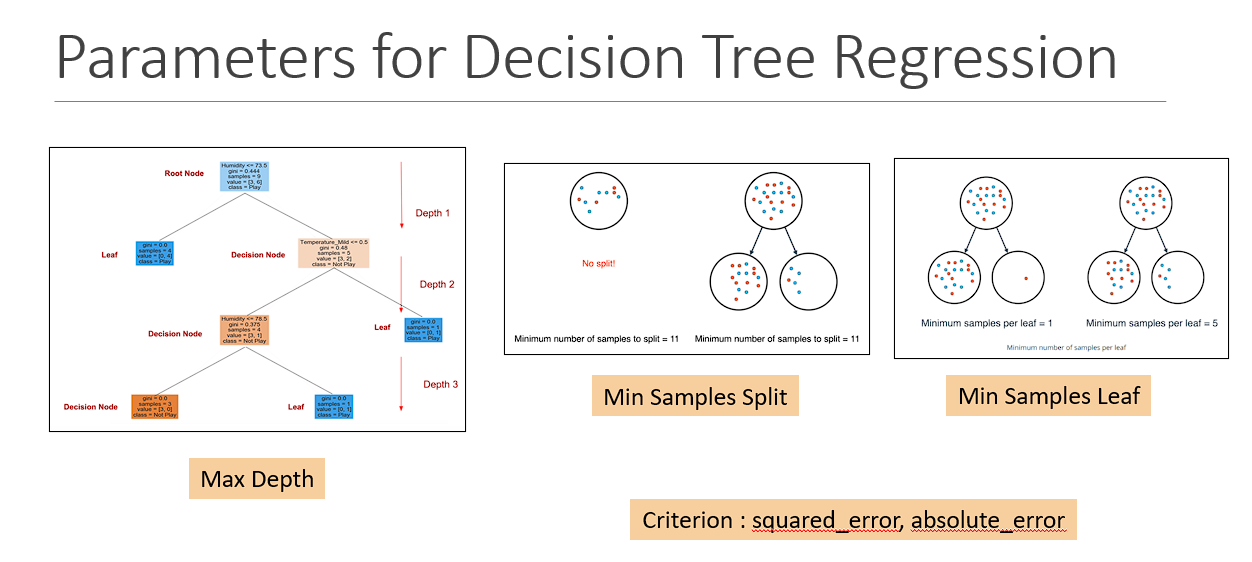

In [59]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=9,min_samples_split=9,min_samples_leaf=5,criterion='squared_error')
model

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=9)

In [60]:
model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=9)

In [61]:
model.score(xtrain,ytrain)

0.8883526077255858

In [62]:
model.score(xtest,ytest)

0.9096092085468162

## Hyperparameter tuning by Gridsearchcv

In [46]:
params = {'max_depth':[2,3,4,5,6,7,8,9,10,11,12],
          'min_samples_split':[2,3,4,5,6,7,8,9,10],
          'min_samples_leaf':[5,6,7,8,9],
          'criterion':['squared_error','absolute_error']}

In [47]:
params

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_samples_leaf': [5, 6, 7, 8, 9],
 'criterion': ['squared_error', 'absolute_error']}

In [48]:
from sklearn.model_selection import GridSearchCV
dtr = DecisionTreeRegressor()
gscv = GridSearchCV(dtr,param_grid=params,cv=5,scoring='neg_root_mean_squared_error')
gscv.fit(xtrain , ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [5, 6, 7, 8, 9],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='neg_root_mean_squared_error')

In [49]:
gscv.best_params_

{'criterion': 'squared_error',
 'max_depth': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 9}

In [50]:
gscv.best_score_

-18314.255172192796

In [51]:
best_dtr = gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=9, min_samples_leaf=5, min_samples_split=9)

In [52]:
best_dtr.score(xtrain,ytrain)

0.8883526077255858

In [53]:
best_dtr.score(xtest,ytest)

0.9096092085468162


## Predicting values for training and testing 

In [54]:
ypred_tr = best_dtr.predict(xtrain)
ypred_ts = best_dtr.predict(xtest)

In [58]:
ypred_tr[0:5]

array([177643.582     ,  59027.19625   ,  59027.19625   ,  59027.19625   ,
       140382.92857143])

In [57]:
ytrain.head()

,PROFIT
6,156122.51
41,77798.83
46,49490.75
47,42559.73
15,129917.04


In [63]:
ypred_ts[0:5]

array([140382.92857143,  95086.23875   ,  95086.23875   ,  59027.19625   ,
       140382.92857143])

In [65]:
ytest.head()

,PROFIT
13,134307.35
39,81005.76
30,99937.59
45,64926.08
17,125370.37


## Plotting a Regression  tree

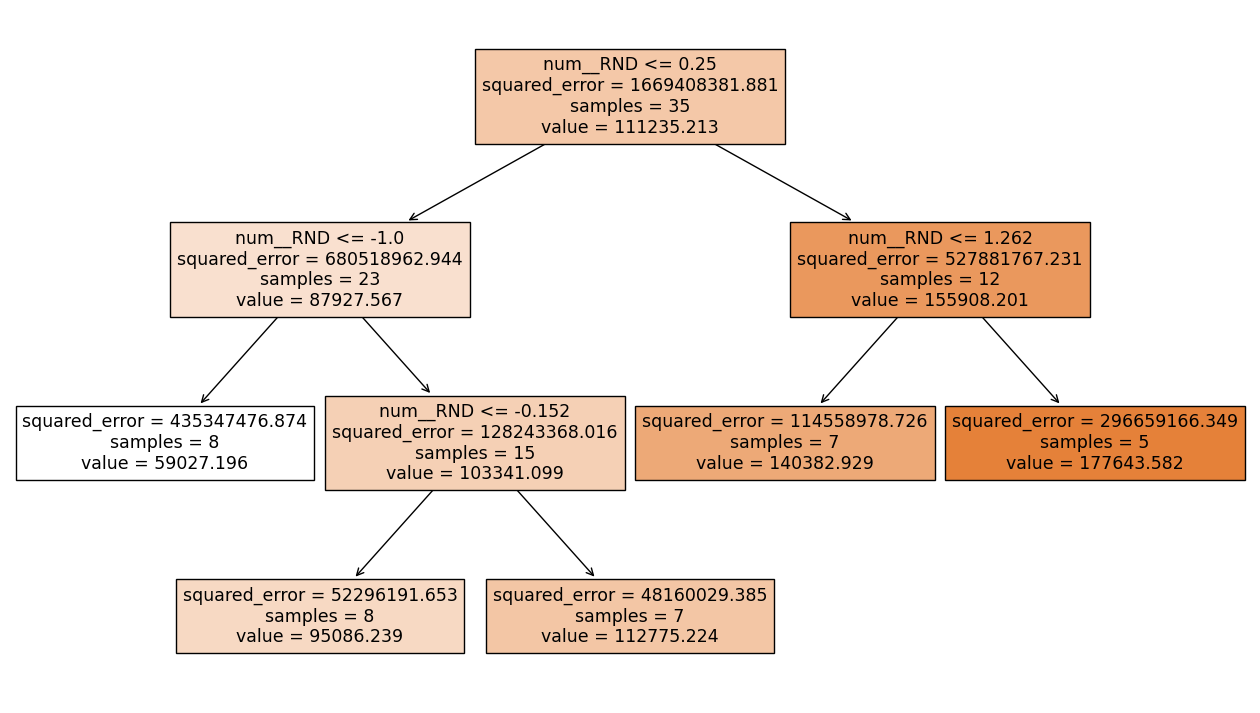

In [66]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(16,9))
plot_tree(best_dtr,feature_names=list(xtrain.columns),filled=True)
plt.show()

## Evaluate the model 

In [69]:
from PM2 import evaluate_model

In [71]:
evaluate_model(xtrain,ytrain,xtest,ytest,best_dtr)

Training Results :

MSE : 186385092.48
RMSE: 13652.29
MAE : 10744.36
R2  : 0.8884


Testing Results :

MSE : 127179932.86
RMSE: 11277.41
MAE : 9564.18
R2  : 0.9096


## Predicting new values 

In [72]:
X.columns

Index(['RND', 'ADMIN', 'MKT', 'STATE'], dtype='object')

In [73]:
xnew = {'RND':[160000],
        'ADMIN':[200000],
        'MKT':[100000],
        'STATE':['New York']}
xnew = pd.DataFrame(xnew)
xnew


,RND,ADMIN,MKT,STATE
0,160000,200000,100000,New York


In [74]:
xnew_pre= pre.transform(xnew)
xnew_pre

array([[ 1.89869379,  2.83583667, -0.9170987 ,  0.        ,  0.        ,
         1.        ]])

In [75]:
Xnew_pre = pd.DataFrame(xnew_pre,columns=cols)
Xnew_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,1.898694,2.835837,-0.917099,0.0,0.0,1.0


In [77]:
pred = best_dtr.predict(xnew_pre)
pred

array([177643.582])